In [1]:
#把下方安裝檔放到根本檔案同資料夾 再執行安裝即可
#!pip install TA_Lib-0.4.18-cp37-cp37m-win_amd64.whl

In [2]:
import talib
import pandas as pd
import numpy as ny
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [3]:
#獲得股票資料
df = pd.read_csv('2317.TW.csv',index_col='Date')

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,41.392399,41.392399,41.392399,41.392399,21.429829,0.0
2000-01-04,21.226801,22.112200,20.965799,21.935101,11.356323,100969046.0
2000-01-05,21.672899,22.466299,21.495899,21.935101,11.356323,78951619.0
2000-01-06,22.027100,22.466299,21.403900,21.935101,11.356323,94351316.0
2000-01-07,21.226801,21.672899,20.872700,21.049801,10.897982,63538588.0


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-20,79.599998,79.900002,75.599998,77.099998,77.099998,61942250.0
2020-08-21,78.199997,78.400002,77.500000,78.199997,78.199997,24487793.0
2020-08-24,78.199997,78.400002,77.599998,77.599998,77.599998,21801923.0
2020-08-25,78.099998,78.500000,77.800003,78.300003,78.300003,17655262.0
2020-08-26,78.300003,78.400002,77.900002,78.199997,78.199997,16266412.0


In [6]:
21502 * 1000 #上面Volume應該是股數

21502000

In [7]:
#!pip install TA-Lib

In [8]:
#from talib import abstract   # abstract  是 talib 裡面計算指標用的

In [9]:
import talib

In [10]:
#df.set_axis(["open","high","low","close","adj","volume"], axis=1, inplace=True) #因為Talib要小寫

In [11]:
sma = talib.SMA(df["Close"][-3000:],60)

In [12]:
ma = df["Close"][-3000:].rolling(60).mean()

In [13]:
sma

Date
2008-06-27   NaN
2008-06-30   NaN
2008-07-01   NaN
2008-07-02   NaN
2008-07-03   NaN
              ..
2020-08-20   NaN
2020-08-21   NaN
2020-08-24   NaN
2020-08-25   NaN
2020-08-26   NaN
Length: 3000, dtype: float64

In [14]:
sma.dropna()

Series([], dtype: float64)

In [15]:
ma

Date
2008-06-27          NaN
2008-06-30          NaN
2008-07-01          NaN
2008-07-02          NaN
2008-07-03          NaN
                ...    
2020-08-20    80.975000
2020-08-21    81.023334
2020-08-24    81.061667
2020-08-25    81.103334
2020-08-26    81.136667
Name: Close, Length: 3000, dtype: float64

In [16]:
#為什麼talib後面是nan???
#所以資料庫很重要 網路上的資料不可信XD

In [17]:
#去掉空白
#2016-1-30是na
df.dropna(inplace=True)

In [18]:
sma = talib.SMA(df["Close"][-3000:],60)

In [19]:
sma

Date
2008-06-16          NaN
2008-06-17          NaN
2008-06-18          NaN
2008-06-19          NaN
2008-06-20          NaN
                ...    
2020-08-20    80.975000
2020-08-21    81.023334
2020-08-24    81.061667
2020-08-25    81.103334
2020-08-26    81.136667
Length: 3000, dtype: float64

In [20]:
ma = df["Close"][-3000:].rolling(60).mean()
ma

Date
2008-06-16          NaN
2008-06-17          NaN
2008-06-18          NaN
2008-06-19          NaN
2008-06-20          NaN
                ...    
2020-08-20    80.975000
2020-08-21    81.023334
2020-08-24    81.061667
2020-08-25    81.103334
2020-08-26    81.136667
Name: Close, Length: 3000, dtype: float64

# 製作Features
把每日盤面送入talib可以幫你求出各種指標,以一條data輸出
<br/>最後整合多條指標成為table 可以成為送入ai的參數

In [21]:
sma_60 = talib.SMA(df["Close"],60)
sma_20 = talib.SMA(df["Close"],20)
sma_5 = talib.SMA(df["Close"],5)

In [22]:
sma_60

Date
2000-01-03          NaN
2000-01-04          NaN
2000-01-05          NaN
2000-01-06          NaN
2000-01-07          NaN
                ...    
2020-08-20    80.975000
2020-08-21    81.023334
2020-08-24    81.061667
2020-08-25    81.103334
2020-08-26    81.136667
Length: 5163, dtype: float64

In [23]:
rsi = talib.RSI(df["Close"],14)

In [24]:
sma_60

Date
2000-01-03          NaN
2000-01-04          NaN
2000-01-05          NaN
2000-01-06          NaN
2000-01-07          NaN
                ...    
2020-08-20    80.975000
2020-08-21    81.023334
2020-08-24    81.061667
2020-08-25    81.103334
2020-08-26    81.136667
Length: 5163, dtype: float64

C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

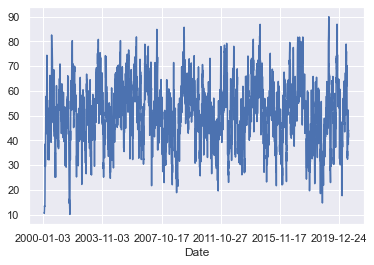

In [25]:
rsi.plot()

In [26]:
k, d = talib.STOCH  (df["High"], df["Low"], df["Close"], fastk_period=120, slowk_period=60, slowd_period=60)

In [27]:
k

Date
2000-01-03          NaN
2000-01-04          NaN
2000-01-05          NaN
2000-01-06          NaN
2000-01-07          NaN
                ...    
2020-08-20    58.212529
2020-08-21    58.544664
2020-08-24    58.833131
2020-08-25    59.142460
2020-08-26    59.420444
Length: 5163, dtype: float64

In [28]:
d

Date
2000-01-03          NaN
2000-01-04          NaN
2000-01-05          NaN
2000-01-06          NaN
2000-01-07          NaN
                ...    
2020-08-20    43.274047
2020-08-21    43.768126
2020-08-24    44.267153
2020-08-25    44.773257
2020-08-26    45.286402
Length: 5163, dtype: float64

# 製作DataSet

In [29]:
#利用算出來的五條數值表組成table
dataset = pd.DataFrame({
        'sma_60': sma_60,
        'sma_20': sma_20,
        'sma_5': sma_5,
        'k':k,
        'd':d,
        'rsi':rsi
    })
    

In [30]:
dataset

,sma_60,sma_20,sma_5,k,d,rsi
Date,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,25.649501,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-08-20,80.975000,78.960001,79.360001,58.212529,43.274047,38.371617
2020-08-21,81.023334,78.870000,78.920000,58.544664,43.768126,43.020091
2020-08-24,81.061667,78.850000,78.400000,58.833131,44.267153,41.194869


In [31]:
usefeatures = dataset.columns

In [32]:
usefeatures

Index(['sma_60', 'sma_20', 'sma_5', 'k', 'd', 'rsi'], dtype='object')

In [33]:
#新增一參數表示三日後是否上漲 為 最終目標的Label -> 所以是監督式學習,有給答案
dataset["Return"] = (df["Close"].shift(-3) / df["Close"] ) > 1

In [34]:
#新增參數為價格 ,放入訓練 -> 也是Label 的作用 , 所以此AI 可以求上涨與否 和 未來價格 求兩個輸出 
dataset["Price"] = df["Close"]

In [35]:
dataset

,sma_60,sma_20,sma_5,k,d,rsi,Return,Price
Date,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,False,41.392399
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,False,21.935101
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,False,21.935101
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,False,21.935101
2000-01-07,NaN,NaN,25.649501,NaN,NaN,NaN,True,21.049801
...,...,...,...,...,...,...,...,...
2020-08-20,80.975000,78.960001,79.360001,58.212529,43.274047,38.371617,True,77.099998
2020-08-21,81.023334,78.870000,78.920000,58.544664,43.768126,43.020091,False,78.199997
2020-08-24,81.061667,78.850000,78.400000,58.833131,44.267153,41.194869,False,77.599998


# 準備訓練資料跟測試資料

In [36]:
#filter na (去掉不能用的資料)
print("before dropping NaN", dataset.shape)
dataset.dropna(inplace=True)
print("after dropping NaN", dataset.shape)



before dropping NaN (5163, 8)
after dropping NaN (4926, 8)


In [37]:
dataset[1000:2000]

,sma_60,sma_20,sma_5,k,d,rsi,Return,Price
Date,,,,,,,,
2004-09-29,31.058918,33.124575,32.882481,37.001052,23.919671,51.293570,True,32.737301
2004-09-30,31.127115,33.131550,32.824401,37.957116,24.141040,55.730733,True,33.306599
2004-10-01,31.198475,33.209545,32.938281,38.950910,24.390707,58.784220,True,33.736500
2004-10-04,31.284018,33.344610,33.364681,40.095539,24.671644,64.067759,True,34.587502
2004-10-05,31.369562,33.437120,33.791081,41.240168,24.982425,64.067759,True,34.587502
...,...,...,...,...,...,...,...,...
2008-09-23,73.960981,71.827244,70.175479,28.804842,25.621019,53.020955,False,74.402901
2008-09-24,73.946890,71.258069,71.359158,29.283372,25.676163,49.612675,False,72.430099
2008-09-25,73.893995,70.756289,72.035539,29.637303,25.743484,45.147772,False,69.611801


In [38]:
dataset.index

Index(['2000-11-29', '2000-11-30', '2000-12-01', '2000-12-04', '2000-12-05',
       '2000-12-06', '2000-12-07', '2000-12-08', '2000-12-11', '2000-12-12',
       ...
       '2020-08-13', '2020-08-14', '2020-08-17', '2020-08-18', '2020-08-19',
       '2020-08-20', '2020-08-21', '2020-08-24', '2020-08-25', '2020-08-26'],
      dtype='object', name='Date', length=4926)

In [39]:
dataset_train = dataset[:'2016'] #2016年前是訓練資料
dataset_test = dataset['2016':]  #2016後是測試資料
train_price = dataset["Price"][:'2016'] #價格標籤
test_price = dataset["Price"]['2016':]
train_x = dataset_train[usefeatures] # 訓練參數(全)
train_y = dataset_train['Return'] # 賺賠標籤
test_x = dataset_test[usefeatures] 
test_y = dataset_test['Return']

In [40]:
train_x #注意要沒有拿到price!!


,sma_60,sma_20,sma_5,k,d,rsi
Date,,,,,,
2000-11-29,29.114308,28.921570,28.645360,42.734029,64.734875,51.847236
2000-11-30,28.959783,29.003630,28.555380,41.834065,64.273154,48.516251
2000-12-01,28.852588,29.026125,28.495280,41.202165,63.787093,51.217557
2000-12-04,28.727906,28.951165,28.195440,40.466931,63.280674,43.787823
2000-12-05,28.588378,28.734660,27.717440,39.645698,62.751664,40.644791
...,...,...,...,...,...,...
2015-12-25,96.670446,93.960230,92.409100,52.867856,50.353584,43.180929
2015-12-28,96.581432,93.789780,92.318201,52.561348,50.496600,40.599031
2015-12-29,96.481051,93.488640,92.318201,52.203548,50.635150,39.332303


In [41]:
test_x

,sma_60,sma_20,sma_5,k,d,rsi
Date,,,,,,
2016-01-04,96.115521,92.698865,91.454539,50.881659,51.035903,32.780151
2016-01-05,95.945061,92.380685,91.022719,50.231957,51.157073,33.513739
2016-01-06,95.784076,92.102275,90.636358,49.620932,51.270378,33.124436
2016-01-07,95.636350,91.818185,90.045459,49.055724,51.378456,30.458913
2016-01-08,95.471578,91.539780,89.409099,48.423937,51.481286,29.368112
...,...,...,...,...,...,...
2020-08-20,80.975000,78.960001,79.360001,58.212529,43.274047,38.371617
2020-08-21,81.023334,78.870000,78.920000,58.544664,43.768126,43.020091
2020-08-24,81.061667,78.850000,78.400000,58.833131,44.267153,41.194869


# 準備模型

In [42]:
import keras.layers as layers
from keras.models import Sequential
import keras

Using TensorFlow backend.


In [43]:
model = Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(len(usefeatures),)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="adam")
#印出模型
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               700       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 10,901
Trainable params: 10,901
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(train_x,train_y)


Epoch 1/1
3796/3796 [==============================] - 0s 75us/step - loss: 1.1751


In [45]:
#預測上漲下跌成功率
exp_y = model.predict(train_x[usefeatures])

In [46]:
exp_y[0:3]

array([[0.5621471],
       [0.573638 ],
       [0.5591793]], dtype=float32)

In [47]:
exp_y.shape

(3796, 1)

In [48]:
#轉換一下陣列型別,用reshape  使pd.Series可以把 Date 和 預測值結合
exp_y = exp_y.reshape(3796,)

In [49]:
#exp_y = exp_y.swapaxes(0, 1)[0]

In [50]:
exp_y.shape

(3796,)

In [57]:
#要知道這些預測值對應哪些天：弄成dataframe
pd.Series(exp_y,train_x.index)

Date
2000-11-29    0.562147
2000-11-30    0.573638
2000-12-01    0.559179
2000-12-04    0.583087
2000-12-05    0.593504
                ...   
2015-12-25    0.535095
2015-12-28    0.511836
2015-12-29    0.503791
2015-12-30    0.523276
2015-12-31    0.521273
Length: 3796, dtype: float32

In [58]:
#比較
df["Close"].shape

(5163,)

In [59]:
exp_y = pd.Series(exp_y, index=train_x.index)

In [60]:
exp_y

Date
2000-11-29    0.562147
2000-11-30    0.573638
2000-12-01    0.559179
2000-12-04    0.583087
2000-12-05    0.593504
                ...   
2015-12-25    0.535095
2015-12-28    0.511836
2015-12-29    0.503791
2015-12-30    0.523276
2015-12-31    0.521273
Length: 3796, dtype: float32

C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

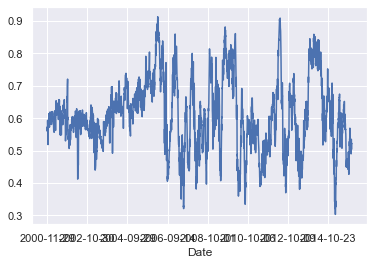

In [61]:
exp_y.plot()

<AxesSubplot:>

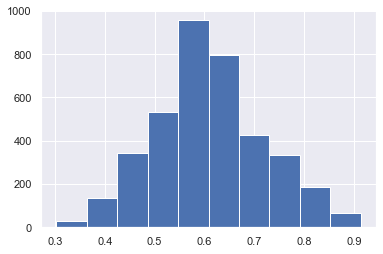

In [62]:
#成功率分布
exp_y.hist()

In [70]:
(exp_y > exp_y.quantile(0.6)).rolling(3).sum()

Date
2000-11-29    NaN
2000-11-30    NaN
2000-12-01    0.0
2000-12-04    0.0
2000-12-05    0.0
             ... 
2015-12-25    0.0
2015-12-28    0.0
2015-12-29    0.0
2015-12-30    0.0
2015-12-31    0.0
Length: 3796, dtype: float64

In [71]:
hold = (exp_y > exp_y.quantile(0.6)).rolling(3).sum() > 0 
#exp_y 比自己PR 60的人還要大 就買
#rolling 3 代表連續看三天
#sum>0 代表有一天>0就持有 一持有就是要抱三天
#注意括號位置
#總之: 取得期望值大於PR60 且連三天總和大於0 存入hold 表示該買

In [72]:
# A bool list it tell as which day should buy
hold

Date
2000-11-29    False
2000-11-30    False
2000-12-01    False
2000-12-04    False
2000-12-05    False
              ...  
2015-12-25    False
2015-12-28    False
2015-12-29    False
2015-12-30    False
2015-12-31    False
Length: 3796, dtype: bool

In [80]:
returns = train_price.shift(-1) - train_price

C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

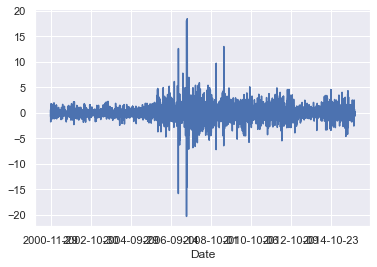

In [81]:
#returns 表示差值
returns.plot()

C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

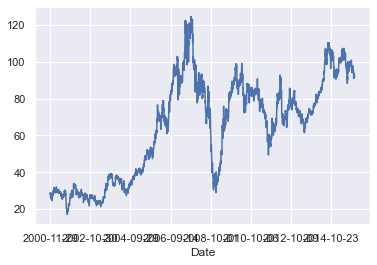

In [74]:
train_price.plot()

C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

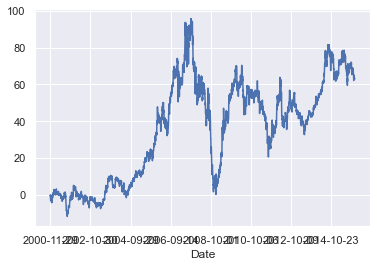

In [82]:
#每天加差值會跟原來的一樣
returns.cumsum().plot()

In [83]:
returns

Date
2000-11-29   -0.748800
2000-11-30    0.599300
2000-12-01   -1.799600
2000-12-04   -0.890801
2000-12-05   -0.300399
                ...   
2015-12-25   -0.681801
2015-12-28   -0.341004
2015-12-29    0.227303
2015-12-30   -0.113602
2015-12-31         NaN
Name: Price, Length: 3796, dtype: float64

C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

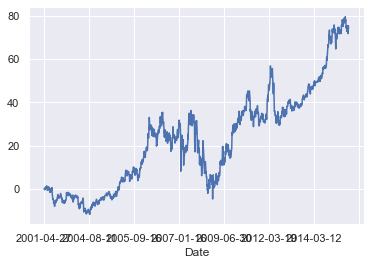

In [85]:
#加總被計算應持有(hold == True)的差值 最高點為賺的錢
returns[hold==True].cumsum().plot()

In [88]:
#最後一個為賺的錢
returns[hold==True].cumsum()

Date
2001-04-27     0.000000
2001-04-30     0.000000
2001-05-01    -0.298900
2001-05-02     0.300400
2001-05-03    -0.449899
                ...    
2015-08-19    73.845680
2015-08-20    71.789482
2015-08-24    75.469085
2015-08-25    73.845779
2015-08-26    75.036186
Name: Price, Length: 1692, dtype: float64

In [89]:
hold

Date
2000-11-29    False
2000-11-30    False
2000-12-01    False
2000-12-04    False
2000-12-05    False
              ...  
2015-12-25    False
2015-12-28    False
2015-12-29    False
2015-12-30    False
2015-12-31    False
Length: 3796, dtype: bool

In [90]:
#手續費 可以看看有沒有虧了! 賺 - 手續費
(hold.astype(int).diff().abs().fillna(0) * 3).sum()

330.0

In [92]:
#跟傻瓜比 算說會不會比隨機買賺
hold_count = hold.sum()
print(hold_count)
print(len(returns))

1692
3796


<AxesSubplot:>

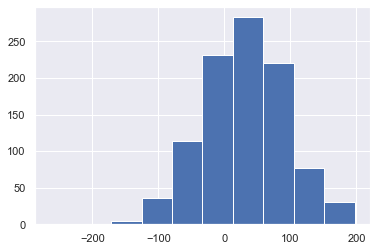

In [215]:
import numpy as np;
samples=[];
for i in range(1000):
  ret = np.random.choice(returns.dropna(),hold_count).sum();
  #print(ret)
  samples.append(ret)

#samples.hist()
pd.Series(samples).hist()

In [216]:
(pd.Series(samples)>950).sum() / len(samples) #賺超過950塊佔傻瓜的比重 0.3%

0.0

final 158.18685999999974 and fee: 450.0


C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


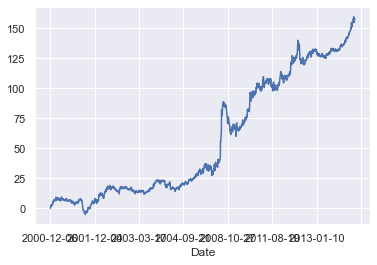

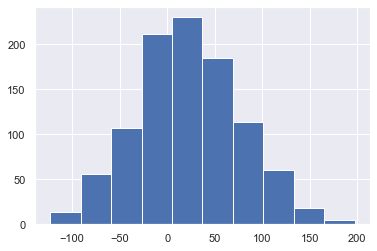

In [217]:
#下面function寫好再回來測試
showResult(train_price,exp_y,0.6)
plt.show()
showRandomResult(train_price,exp_y)

# 練習:把上面兩段分析變成function

In [100]:
#待改
def showResult(prices,predicts,threshhold=0.7):
    change = (prices.shift(-1) - prices)
    signal = (predicts > predicts.quantile(threshhold)).rolling(3).sum() > 0
    profit = (change[signal]).cumsum()
    fee = (signal.astype(int).diff().abs().fillna(0) * 3).sum()
    print("final" , profit[-1] , "and fee:" , fee)
    profit.plot()

In [101]:
import numpy as np;

def showRandomResult(prices,predicts,threshhold=0.7):
    samples=[];
    cumReturn = (prices.shift(-1) - prices)
    signal = (predicts > predicts.quantile(threshhold)).rolling(3).sum() > 0
    holds_count = signal.sum()
    for i in range(1000):
      ret = np.random.choice(cumReturn.dropna(),holds_count).sum();
      #print(ret)
      samples.append(ret)

    #samples.hist()
    pd.Series(samples).hist()

# 面對現實(用test_x)

In [102]:
exp_test_y = model.predict(test_x[usefeatures])
print(exp_test_y[:10])

[[0.5107843 ]
 [0.5044144 ]
 [0.504432  ]
 [0.5169007 ]
 [0.51926893]
 [0.59409   ]
 [0.5142735 ]
 [0.49483266]
 [0.513596  ]
 [0.545725  ]]


In [103]:
exp_test_y = exp_test_y.swapaxes(0, 1)[0]
print(exp_test_y[:10])

[0.5107843  0.5044144  0.504432   0.5169007  0.51926893 0.59409
 0.5142735  0.49483266 0.513596   0.545725  ]


C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

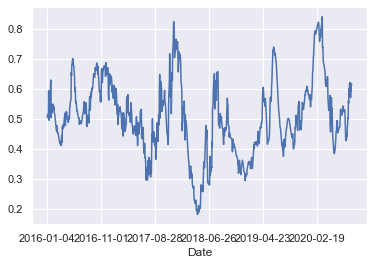

In [104]:
exp_test_y = pd.Series(exp_test_y,index=test_x.index)
exp_test_y.plot()

final nan and fee: 111.0


C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


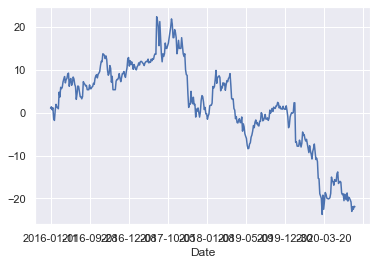

In [105]:
showResult(test_price,exp_test_y)

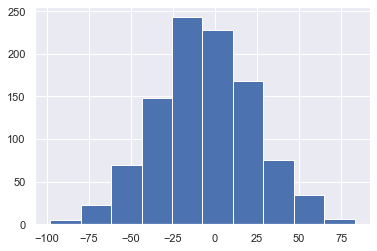

In [106]:
showRandomResult(test_price,exp_test_y)

In [225]:
#所以AI預測股票到底是?

In [226]:
#回過頭來 為什麼每個人的結果不太一樣？
#我們剛剛其實只訓練一次
#結果還不穩定

# 模型調整1 : 加入batch,epoches

In [109]:
#model.compile(loss='binary_crossentropy', optimizer="adam", 
#              batch_size=5000, epochs=200, validation_split=0.2)

In [110]:
model = Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(len(usefeatures),)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               700       
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 10,901
Trainable params: 10,901
Non-trainable params: 0
_________________________________________________________________


In [115]:
history = model.fit(train_x,train_y,
          batch_size=50, epochs=50)

Epoch 1/50
3796/3796 [==============================] - 0s 22us/step - loss: 0.6949
Epoch 2/50
3796/3796 [==============================] - 0s 24us/step - loss: 0.6859
Epoch 3/50
3796/3796 [==============================] - 0s 22us/step - loss: 0.7003
Epoch 4/50
3796/3796 [==============================] - 0s 24us/step - loss: 0.6932
Epoch 5/50
3796/3796 [==============================] - 0s 23us/step - loss: 0.6969
Epoch 6/50
3796/3796 [==============================] - 0s 19us/step - loss: 0.6987
Epoch 7/50
3796/3796 [==============================] - 0s 23us/step - loss: 0.6976
Epoch 8/50
3796/3796 [==============================] - 0s 21us/step - loss: 0.7007
Epoch 9/50
3796/3796 [==============================] - 0s 20us/step - loss: 0.7005
Epoch 10/50
3796/3796 [==============================] - 0s 19us/step - loss: 0.6924
Epoch 11/50
3796/3796 [==============================] - 0s 20us/step - loss: 0.6903
Epoch 12/50
3796/3796 [==============================] - 0s 20us/step - lo

In [116]:
def get_predict_series(inputX,model):
    predict = model.predict(inputX[usefeatures])
    predict = predict.swapaxes(0, 1)[0]
    predict_df = pd.Series(predict,index=inputX.index)
    predict_df.plot()
    plt.show()
    return predict_df

C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


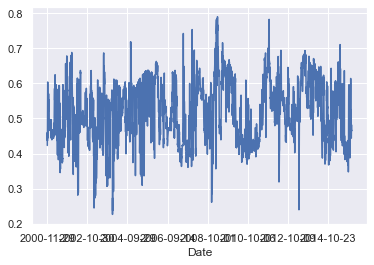

Date
2000-11-29    0.423240
2000-11-30    0.460306
2000-12-01    0.436530
2000-12-04    0.534687
2000-12-05    0.591476
                ...   
2015-12-25    0.444018
2015-12-28    0.470364
2015-12-29    0.482003
2015-12-30    0.464359
2015-12-31    0.466508
Length: 3796, dtype: float32

In [117]:
get_predict_series(train_x,model)

C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


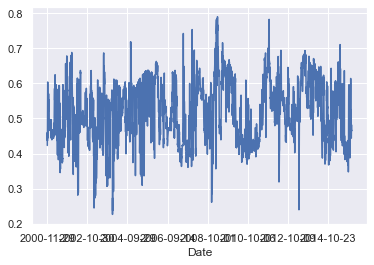

C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


final 258.9163030000002 and fee: 714.0


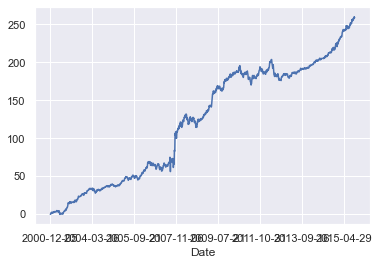

In [118]:
showResult(train_price,get_predict_series(train_x,model))

C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


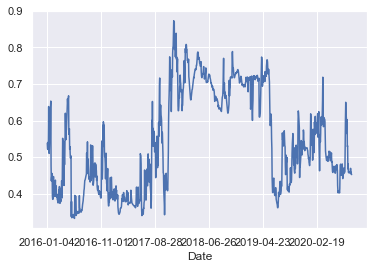

C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


final -44.90670700000001 and fee: 72.0


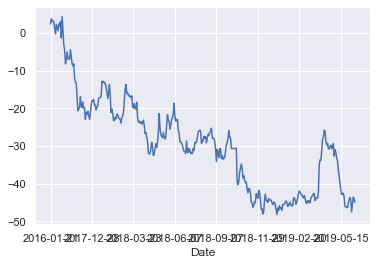

In [119]:
#一定有人覺得這次妥當了!
showResult(test_price,get_predict_series(test_x,model))

In [122]:
history.history

{'loss': [0.6949020605632452,
  0.6858562998261668,
  0.7003080635729027,
  0.6932062147100808,
  0.6968661886183555,
  0.6986735645913223,
  0.6976433618365148,
  0.7007403354875908,
  0.7004598445083369,
  0.6923764469877309,
  0.6902766371866172,
  0.6889667273886714,
  0.6856837663936917,
  0.6813796495800902,
  0.6856583442904047,
  0.6906074131627983,
  0.6912800292194957,
  0.6773523811419722,
  0.6905804739988265,
  0.6831512799755414,
  0.6911231799108085,
  0.6845304194692565,
  0.6833662427451512,
  0.6791751850455278,
  0.6835521867202381,
  0.6902742246430842,
  0.6858960963212527,
  0.6853626615380588,
  0.6821520602049893,
  0.682688140800052,
  0.6810256298022979,
  0.6806791171321628,
  0.6825976371137058,
  0.6815466285065931,
  0.680024827776518,
  0.6813688818659748,
  0.6782360240204693,
  0.6856308740547007,
  0.6779218742229414,
  0.685344895177194,
  0.6804512679200027,
  0.6784061303693955,
  0.6782097371787743,
  0.6762464910714217,
  0.6792283486201967,
  0.6

In [127]:
def show_train_history(train_acc):
    plt.plot(history.history[train_acc])
    #plt.plot(history.history[test_acc])
    plt.title('Train History')
    plt.ylabel(train_acc)
    plt.xlabel('Epochs')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

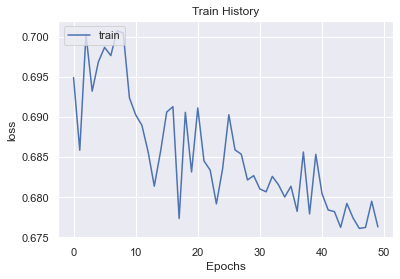

In [128]:
show_train_history('loss')

In [129]:
#教大家怎看訓練模型訓練好了;validation_split
#https://keras.io/zh/metrics/
#评价函数用于评估当前训练模型的性能。当模型编译后（compile），评价函数应该作为 metrics 的参数来输入。

In [130]:
model = Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(len(usefeatures),)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x,train_y,
                    batch_size=50, epochs=50,validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               700       
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 10,901
Trainable params: 10,901
Non-trainable params: 0
_________________________________________________________________
Train on 3036 samples, validate on 760 samples
Epoch 1/50
3036/3036 [==============================] - 0s 75us/step - loss: 1.8060 - accuracy: 0.5066 - val_loss: 0.7378 - val_accuracy: 0.5382
Epoch 2/50
3036/3036 [==============================] - 0s 25us/step - loss: 0.7210 - accuracy: 0.5112 - val_loss: 0.7122 - val_accuracy: 0.5118
Epoch 3/50
3036/3036 [=====================

In [131]:
history.history

{'val_loss': [0.7377547519771677,
  0.7122107477564561,
  0.737953784434419,
  0.7609016048280817,
  0.6951400833694559,
  0.7355275256069083,
  0.7111600041389465,
  0.7072873335135611,
  0.7257335695781206,
  0.710286956084402,
  0.7156361686555963,
  0.6965621741194474,
  0.8700211997094908,
  0.7537008202389667,
  0.7158434500819758,
  0.7427233332081845,
  0.723194516803089,
  0.7234341611987666,
  0.7172258519812634,
  0.8076672381476352,
  0.7667474354568281,
  0.7683798678611454,
  0.7459864616394043,
  0.7293803276200044,
  0.7301298960259086,
  0.7166335857228229,
  0.7251759947914826,
  0.8397467254023803,
  0.7776480771993336,
  0.7362363252200579,
  0.8170471944307026,
  0.9065553773390619,
  0.7147843931850634,
  0.7062407747695321,
  0.709984681323955,
  0.7349744823418165,
  0.7170783414652473,
  0.9103409075423291,
  0.7332295657772767,
  0.8651525535081562,
  0.7340963278946123,
  0.7162914331022062,
  0.7196304147180758,
  0.8387270342362555,
  0.7196210183595356,
  

In [134]:
def new_show_train_history(train_acc,test_acc):
    plt.plot(history.history[train_acc])
    plt.plot(history.history[test_acc])
    plt.title('Train History')
    plt.ylabel(train_acc)
    plt.xlabel('Epochs')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

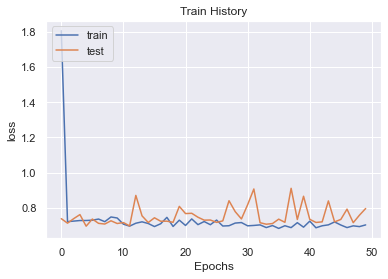

In [135]:
new_show_train_history('loss','val_loss')

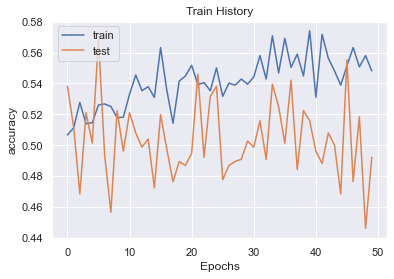

In [137]:
new_show_train_history('accuracy','val_accuracy')

In [138]:
#get_best_model:ModelCheckpoint
#verbose
#https://keras-cn.readthedocs.io/en/latest/models/model/

In [139]:
get_best_model = keras.callbacks.ModelCheckpoint('nn.mdl', monitor='accuracy')
model = Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(len(usefeatures),)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x,train_y,
                    batch_size=10, epochs=100,validation_split=0.2,callbacks=[get_best_model],verbose=1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               700       
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
Total params: 10,901
Trainable params: 10,901
Non-trainable params: 0
_________________________________________________________________
Train on 3036 samples, validate on 760 samples
Epoch 1/100
3036/3036 [==============================] - 0s 157us/step - loss: 1.0337 - accuracy: 0.5138 - val_loss: 1.0460 - val_accuracy: 0.5513
Epoch 2/100
3036/3036 [==============================] - 0s 119us/step - loss: 0.8804 - accuracy: 0.4901 - val_loss: 1.1062 - val_accuracy: 0.5158
Epoch 3/100
3036/3036 [================

3036/3036 [==============================] - 0s 127us/step - loss: 0.6815 - accuracy: 0.5639 - val_loss: 0.7320 - val_accuracy: 0.4855
Epoch 52/100
3036/3036 [==============================] - 0s 122us/step - loss: 0.6817 - accuracy: 0.5629 - val_loss: 0.7007 - val_accuracy: 0.5263
Epoch 53/100
3036/3036 [==============================] - 0s 125us/step - loss: 0.6820 - accuracy: 0.5632 - val_loss: 0.7010 - val_accuracy: 0.5224
Epoch 54/100
3036/3036 [==============================] - 0s 125us/step - loss: 0.6823 - accuracy: 0.5573 - val_loss: 0.7093 - val_accuracy: 0.5184
Epoch 55/100
3036/3036 [==============================] - 0s 128us/step - loss: 0.6796 - accuracy: 0.5682 - val_loss: 0.7099 - val_accuracy: 0.5250
Epoch 56/100
3036/3036 [==============================] - 0s 128us/step - loss: 0.6811 - accuracy: 0.5603 - val_loss: 0.7057 - val_accuracy: 0.5211
Epoch 57/100
3036/3036 [==============================] - 0s 134us/step - loss: 0.6812 - accuracy: 0.5629 - val_loss: 0.7106 

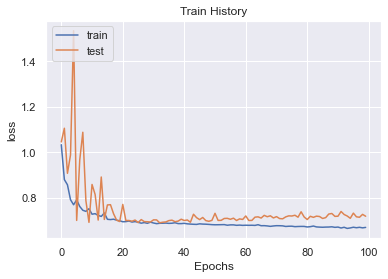

In [143]:
new_show_train_history('loss','val_loss')

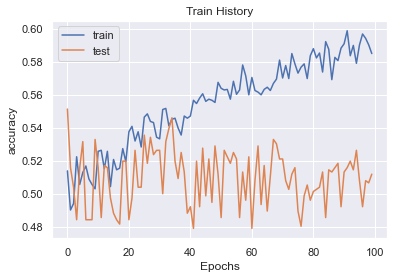

In [144]:
new_show_train_history('accuracy','val_accuracy')

In [145]:
model.load_weights("lstm.mdl")

OSError: Unable to open file (unable to open file: name = 'lstm.mdl', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


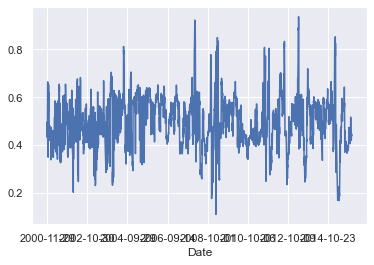

C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


final 211.23463600000005 and fee: 738.0


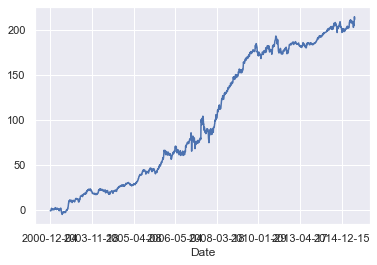

In [146]:
showResult(train_price,get_predict_series(train_x,model))

C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


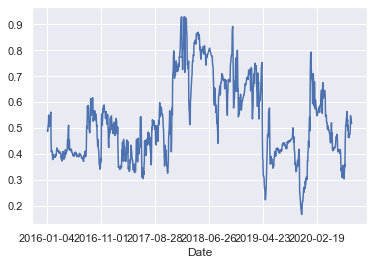

C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


final -33.724988999999994 and fee: 72.0


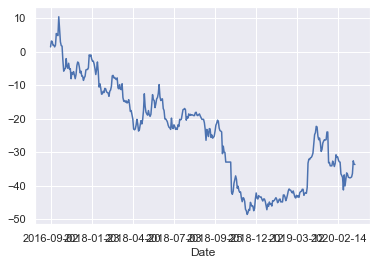

In [147]:
showResult(test_price,get_predict_series(test_x,model))

In [148]:
#Precion/Recall

C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


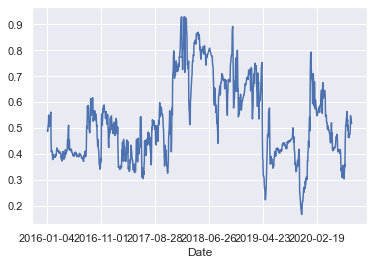

Date
2016-01-04    0.493118
2016-01-05    0.487211
2016-01-06    0.489186
2016-01-07    0.508512
2016-01-08    0.516666
                ...   
2020-08-20    0.547644
2020-08-21    0.518630
2020-08-24    0.533935
2020-08-25    0.517330
2020-08-26    0.520899
Length: 1130, dtype: float32

In [149]:
#confusion matrix
#Recall : 選出來且真的上漲的 / 所有上漲的股票
#Precision: 真的上場的 / 預測上漲的
predicts = get_predict_series(test_x,model)
predicts

In [150]:
pd.crosstab(np.array(test_y),predicts>predicts.quantile(0.7),colnames=['predict'],rownames=['real'])

predict,False,True
real,,
False,389,191
True,402,148


C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


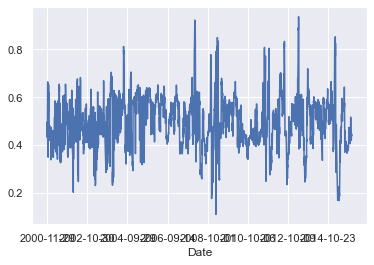

In [151]:
predicts = get_predict_series(train_x,model)

In [152]:
pd.crosstab(np.array(train_y),predicts>predicts.quantile(0.7),colnames=['predict'],rownames=['real'])

predict,False,True
real,,
False,1482,428
True,1175,711


In [153]:
#pip install sklearn

In [154]:
from sklearn.metrics import precision_recall_curve

<AxesSubplot:>

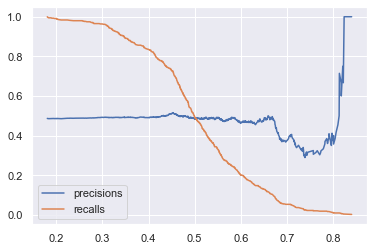

In [155]:
precisions, recalls, thresholds = precision_recall_curve(test_y, exp_test_y)

pd.DataFrame({
    'precisions':precisions[:-1],
    'recalls':recalls[:-1],
}, index=thresholds).plot()


#Recall : 選出來且真的上漲的 / 所有上漲的股票
#Precision: 真的上場的 / 預測上漲的
#畫圖說明

#Precision: 門檻值越大越不會預測會上漲 所以大到1就變成0了
#Recall : 門檻值越小代表你預測全部人都會上漲 所以當=0 當然所有有上漲的都有抓到
#股票比較care precision

In [156]:
test_y

Date
2016-01-04    False
2016-01-05    False
2016-01-06    False
2016-01-07    False
2016-01-08    False
              ...  
2020-08-20     True
2020-08-21    False
2020-08-24    False
2020-08-25    False
2020-08-26    False
Name: Return, Length: 1130, dtype: bool

# 結果分析(準確率）

In [157]:
#benchmarkt
(dataset_test["Return"]>0).sum() / len(dataset_test)

0.48672566371681414

In [250]:
#上面代表我亂猜成功率

# 如何更好？

In [251]:
#換週期(原本預測三天後
#加入更多indicator
#測試不同組合indicator
#門檻值
#正規化
#物理力量
#模型加深
#換模型(LSTM)

In [252]:
dataset.describe()

,sma_60,sma_20,sma_5,k,d,rsi,Price
count,4926.000000,4926.000000,4926.000000,4926.000000,4926.000000,4926.000000,4926.000000
mean,71.677699,71.897238,71.973755,53.699772,53.749805,51.446136,71.993881
std,29.324507,29.425252,29.459900,26.576220,25.140661,12.285658,29.477362
min,21.993469,18.817530,17.743239,5.107396,6.208545,10.098143,17.042999
25%,40.635382,40.980340,41.281180,31.279819,33.910250,43.109599,41.427601
50%,76.174702,76.143675,75.917040,53.082664,53.019320,51.654487,75.900002
75%,91.473395,92.579889,92.348084,79.876869,78.960263,59.881860,92.475000
max,145.802083,146.781250,149.875000,95.536530,94.049702,89.957807,151.875000


In [253]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

dataset_scaled = ss.fit_transform(dataset)
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns, index=dataset.index)
dataset_scaled['Return'] = dataset['Return']
dataset_scaled['Price'] = dataset['Price']
dataset_scaled.describe()

,sma_60,sma_20,sma_5,k,d,rsi,Price
count,4.926000e+03,4.926000e+03,4.926000e+03,4.926000e+03,4.926000e+03,4.926000e+03,4926.000000
mean,-1.384736e-16,9.231574e-17,-4.615787e-16,-1.615526e-16,2.769472e-16,-1.211644e-16,71.993881
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,29.477362
min,-1.694462e+00,-1.804066e+00,-1.841012e+00,-1.828601e+00,-1.891203e+00,-3.365891e+00,17.042999
25%,-1.058687e+00,-1.050799e+00,-1.041948e+00,-8.436952e-01,-7.892223e-01,-6.786273e-01,41.427601
50%,1.533686e-01,1.443273e-01,1.338662e-01,-2.322264e-02,-2.905886e-02,1.696067e-02,75.900002
75%,6.751249e-01,7.029592e-01,6.916655e-01,9.850820e-01,1.002878e+00,6.867016e-01,92.475000
max,2.527985e+00,2.545148e+00,2.644583e+00,1.574378e+00,1.603140e+00,3.135004e+00,151.875000


In [254]:
dataset

,sma_60,sma_20,sma_5,k,d,rsi,Return,Price
Date,,,,,,,,
2000-11-29,29.114308,28.921570,28.645360,42.734029,64.734875,51.847236,False,28.854900
2000-11-30,28.959783,29.003630,28.555380,41.834065,64.273154,48.516251,False,28.106100
2000-12-01,28.852588,29.026125,28.495280,41.202165,63.787093,51.217557,False,28.705400
2000-12-04,28.727906,28.951165,28.195440,40.466931,63.280674,43.787823,False,26.905800
2000-12-05,28.588378,28.734660,27.717440,39.645698,62.751664,40.644791,True,26.014999
...,...,...,...,...,...,...,...,...
2020-08-20,80.975000,78.960001,79.360001,58.212529,43.274047,38.371617,True,77.099998
2020-08-21,81.023334,78.870000,78.920000,58.544664,43.768126,43.020091,False,78.199997
2020-08-24,81.061667,78.850000,78.400000,58.833131,44.267153,41.194869,False,77.599998


In [255]:
dataset_scaled

,sma_60,sma_20,sma_5,k,d,rsi,Return,Price
Date,,,,,,,,
2000-11-29,-1.451609,-1.460651,-1.470908,-0.412657,0.436989,0.032651,False,28.854900
2000-11-30,-1.456879,-1.457862,-1.473962,-0.446524,0.418621,-0.238504,False,28.106100
2000-12-01,-1.460535,-1.457098,-1.476003,-0.470303,0.399286,-0.018607,False,28.705400
2000-12-04,-1.464787,-1.459645,-1.486182,-0.497971,0.379140,-0.623417,False,26.905800
2000-12-05,-1.469545,-1.467004,-1.502409,-0.528875,0.358096,-0.879272,True,26.014999
...,...,...,...,...,...,...,...,...
2020-08-20,0.317081,0.240048,0.250747,0.169822,-0.416728,-1.064318,True,77.099998
2020-08-21,0.318729,0.236989,0.235810,0.182320,-0.397074,-0.685914,False,78.199997
2020-08-24,0.320037,0.236310,0.218157,0.193176,-0.377222,-0.834494,False,77.599998


In [256]:
dataset_train = dataset_scaled[:'2016']
dataset_test = dataset_scaled['2016':]
train_price = dataset_scaled["Price"][:'2016']
test_price = dataset_scaled["Price"]['2016':]
train_x = dataset_train[usefeatures]
train_y = dataset_train['Return']
test_x = dataset_test[usefeatures]
test_y = dataset_test['Return']

In [257]:
model = Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(len(usefeatures),)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x,train_y,
                    batch_size=50, epochs=50,validation_split=0.2,verbose=0)
print('ok')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               700       
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 10,901
Trainable params: 10,901
Non-trainable params: 0
_________________________________________________________________
ok


C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


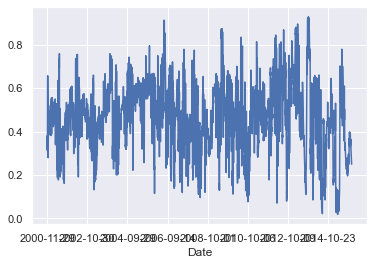

final 402.9626829999997 and fee: 858.0


C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


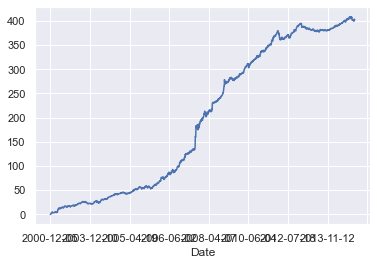

In [258]:
showResult(train_price,get_predict_series(train_x,model))

C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


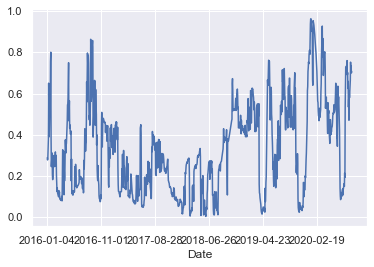

C:\Users\a0970\anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


final nan and fee: 123.0


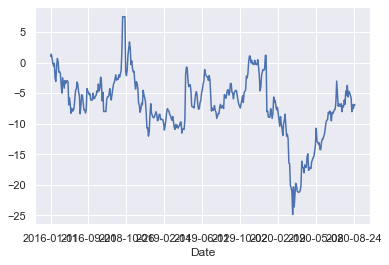

In [259]:
showResult(test_price,get_predict_series(test_x,model))

In [260]:
# 排序
# df.sort_index(inplace=True)

In [261]:
#How many indicators?
talib.get_functions()

['HT_DCPERIOD',
 'HT_DCPHASE',
 'HT_PHASOR',
 'HT_SINE',
 'HT_TRENDMODE',
 'ADD',
 'DIV',
 'MAX',
 'MAXINDEX',
 'MIN',
 'MININDEX',
 'MINMAX',
 'MINMAXINDEX',
 'MULT',
 'SUB',
 'SUM',
 'ACOS',
 'ASIN',
 'ATAN',
 'CEIL',
 'COS',
 'COSH',
 'EXP',
 'FLOOR',
 'LN',
 'LOG10',
 'SIN',
 'SINH',
 'SQRT',
 'TAN',
 'TANH',
 'ADX',
 'ADXR',
 'APO',
 'AROON',
 'AROONOSC',
 'BOP',
 'CCI',
 'CMO',
 'DX',
 'MACD',
 'MACDEXT',
 'MACDFIX',
 'MFI',
 'MINUS_DI',
 'MINUS_DM',
 'MOM',
 'PLUS_DI',
 'PLUS_DM',
 'PPO',
 'ROC',
 'ROCP',
 'ROCR',
 'ROCR100',
 'RSI',
 'STOCH',
 'STOCHF',
 'STOCHRSI',
 'TRIX',
 'ULTOSC',
 'WILLR',
 'BBANDS',
 'DEMA',
 'EMA',
 'HT_TRENDLINE',
 'KAMA',
 'MA',
 'MAMA',
 'MAVP',
 'MIDPOINT',
 'MIDPRICE',
 'SAR',
 'SAREXT',
 'SMA',
 'T3',
 'TEMA',
 'TRIMA',
 'WMA',
 'CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',
